<a href="https://colab.research.google.com/github/sbborusu/530pm_Agentic_Ai_Batch_7thApril/blob/main/CB_Multiclass_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identify hand written digits

1. sklearn.datasets has some ready made datasets that we can use to learn 'machine learning'. load_digits is one of that datasets.
2. This dataset is like opening a small photo album of handwritten numbers. Each "photo" is a tiny black-and-white image that's only 8 pixels by 8 pixels in size — kind of like a mini version of a number written by hand.
3. These images show digits from 0 to 9, and they’re used to help computers learn how to recognize numbers written by people. This is useful for teaching computers to read handwriting, like when you write numbers on a tablet or a check.
4. The same number (like 3, for example) appears many times in the dataset — each time written a little differently. These are all separate records, and each one helps the computer learn that even though the shapes vary, they all represent the same digit. So the dataset has thousands of images — around 1,797 in total.


In [44]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#Load the training dataset

In [4]:
digits = load_digits()
print('Keys:', digits.keys())
print('Total records/samples in the dataset :', len(digits.data))

Keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Total records/samples in the dataset : 1797


In [5]:
# 1. digits.data[0] returns a 1D array with 64 decimal values, and those values represent a single image from the dataset.
# 2. Instead of showing it as a grid (like a picture), it’s laid out in a single row in the form of array elements with decimals.
# 3. Each number in the array represents the brightness of a pixel:
# 3.a. 0 means the pixel is completely white (no ink),
# 3.b. Higher numbers (up to 16) mean the pixel is darker (more ink).
print('First image array in the dataset :', digits.data[0])

First image array in the dataset : [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<Figure size 640x480 with 0 Axes>

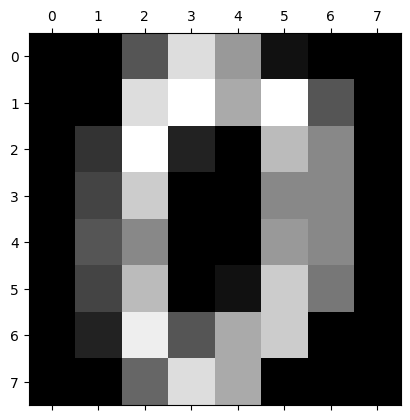

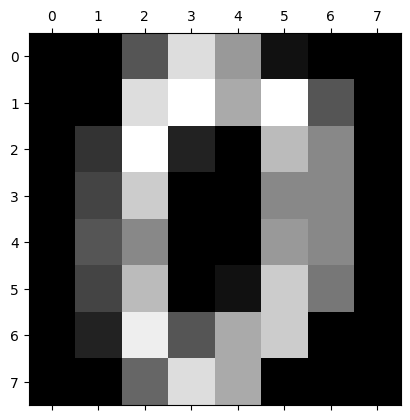

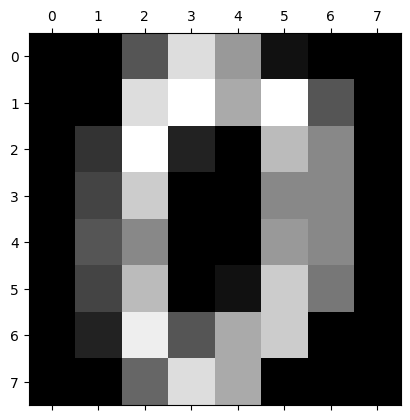

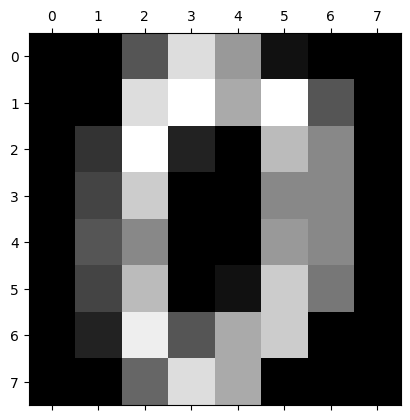

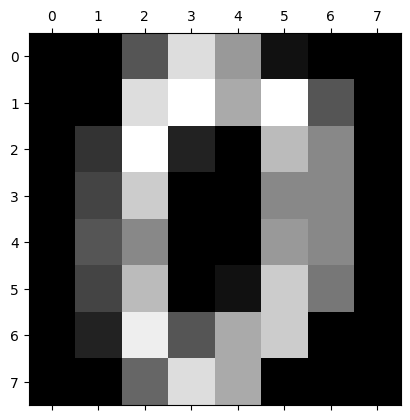

In [9]:
# digits.images[0] returns the image
plt.gray()
for i in range(5):
  plt.matshow(digits.images[0])
  plt.show()

In [13]:
digits.target[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Model creation

In [36]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
model = LogisticRegression(max_iter=1000) #max_iter was needed to avoid the warning 'lbfgs failed to converge'
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<Figure size 640x480 with 0 Axes>

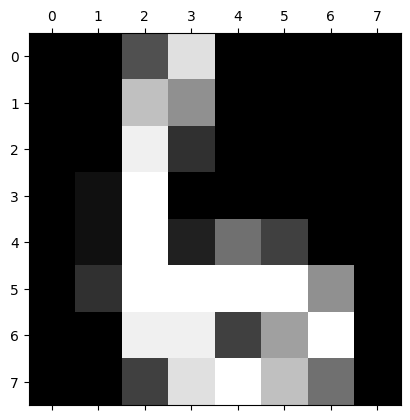

Corresponding number for prediction  6


In [34]:
# Take some random image for prediction
plt.gray()
plt.matshow(digits.images[67])
plt.show()
print('Corresponding number for prediction ', digits.target[67])

In [31]:
model.score(X_test, y_test)

0.9694444444444444

In [38]:
model.predict(digits.data[67].reshape(1,-1))

array([6])

In [39]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# Model's accuracy is 96.94% and not 100%. So, I want to know in which case my model is failing.
1. Use confusion matrix

In [42]:
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Text(0.5, 47.7222222222222, 'Predicted')

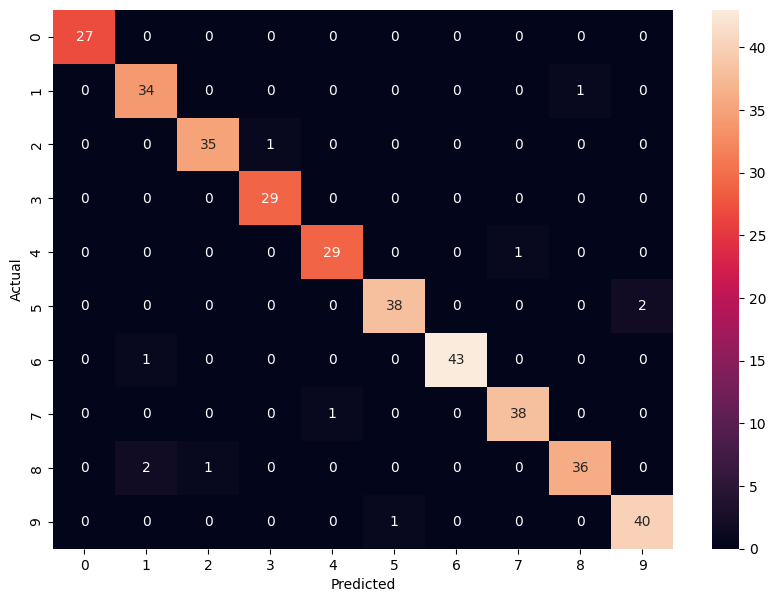

In [49]:
# Visualize confusion matrix using seaborn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# In the below map considering first item which shows as 27, it means 27 times the truth was 0 and my model predicted it as 0.
# Similarly on 2 instances I supplied the image 8, but my model predicted it as 1.